## Betting Against Beta

**Systematic Risk**: Part of risk that cannot be diversified away.

**Beta**: Sensitivity of a firm to systematic risk.

Comapnies with **high beta** are known as **aggressive stocks** or **growth stocks**. In other words, companies which have high growth or high uncertainty or high exposure to systmeatic risk have high beta. On the other hand, companies which have low growth usually have **low beta** and are known as **defensives**.

## Betting Against Beta Trading strategy
The strategy of *Betting against Beta* was proposed by Andrea Frazzini & Lasse Heje Pederson in 2014 in their paper titled "Betting against Beta". The idea is that **constrained investors bid-up high-beta assets** so the assets are **overvalued** and therefore their **alphas (returns above the expected value)** are **low** (possibly negative) => **potential losers**. On the other hand firms with **low-beta** have relatively **high alphas** => **potential winners**. The trading strategy is to **long leveraged low-beta assets** and **short high-beta assets**.

**Capital Asset Pricing Model (CAPM)**:\
Expected Return = E(R) = R$_f$ + $\beta$ (R$_m$ - R$_f$)

where\
R$_f$ = Risk-free Return; R$_m$ = Market Return; $\beta$ = Historical beta of the stock

Alpha or $\alpha$ = Extraordinary Return =  Actual Return - Expected Return

**Steps in strategy**:
1. Get historical beta values for all the firms.
2. Sort companies based on the beta values. One can sort the companies by a) industry b) market c) asset class or d) country.
3. Find the median value of beta.
4. Divide the companies on above median and below median.
5. Go long on low beta stocks and short on high beta stocks.

### Importing necessary modules

In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import bs4
import requests
from datetime import date
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from format import format

### Gettting the list of stocks from NASDAQ

In [19]:
# getting a list of all the stocks from NASDAQ with Market Cap > 0

df = pd.read_csv('nasdaq_screener.csv')
df = df[df['Market Cap'] > 0]
df.reset_index(inplace=True, drop=True)
stocks = list(df['Symbol'])
len(stocks)

5743

### Functions for web-scraping the beta values of companies

In [24]:
# function for getting the historical beta values of stocks from marketwatch.com using the stock ticker
def get_beta_values(ticker):
    '''
    The function returns the historical value of a stock ticker 
    
    inputs:
    ticker: stock ticker of the firm
    
    output:
    returns the hostorical beta value of the stock 
    '''
    
    urlstock = 'https://www.marketwatch.com/investing/stock/'+ticker
    text_soup_stock = BeautifulSoup(requests.get(urlstock, allow_redirects=False).text,"lxml") #read in
    titles_stock = text_soup_stock.findAll('small', {'class': 'label'})
    
    betalist = []
    
    for title in titles_stock:
        if 'Beta' in title.text:
            betalist.append([td.text for td in title.findNextSiblings(attrs={'class': 'primary'}) if td.text])

    return text_parse(betalist[0][0])



def text_parse(text):
    '''
    This function to convert the string outputs of the 
    financial statements to float values  
    '''
    if len(text) == 2:
        text = text[0]
    text = text.strip('(').strip(')').strip('$').strip(' ')
    if text == '-' or text == '' or text =='N/A':
        return None
    elif text[-1] == 'T':
        return float(text.strip('T'))*1e12
    elif text[-1] == 'B':
        return float(text.strip('B'))*1e9
    elif text[-1] == 'M':
        return float(text.strip('M'))*1e6
    elif text[-1] == 'K':
        return float(text.strip('K'))*1e3
    else:
        return float(text)
        

### Getting the beta values for all the stocks

In [67]:
import time
columns = ['symbol', 'beta']
beta_df = pd.DataFrame(columns=columns)

for symbol in stocks:
    #print(symbol)
    try:
        beta = get_beta_values(symbol)
        if beta == None:
            continue
        else:
            beta_df = beta_df.append(pd.DataFrame([[symbol, beta]],columns=columns),ignore_index=True)
    except IndexError:
        pass

### Results

In [71]:
beta_df.head(10)

,symbol,beta
0,A,0.99
1,AA,1.53
2,AACG,0.19
3,AACQ,0.30
4,AAIC,1.47
5,AAL,1.34
6,AAME,0.29
7,AAN,0.88
8,AAOI,1.15
9,AAON,0.89


### Distribution of beta values

<AxesSubplot:xlabel='Beta value of firms', ylabel='Frequency'>

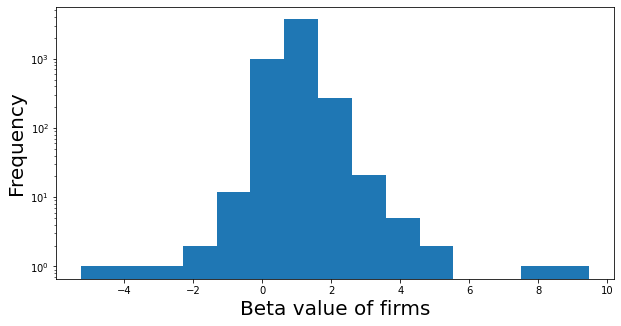

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Beta value of firms',fontsize=20)
ax.set_ylabel('Frequency',fontsize=20)
beta_df['beta'].plot.hist(bins=15,log=True,ax=ax)

### Median beta value

In [53]:
median_beta = beta_df['beta'].median()
median_beta

1.0

### High-Beta firms -> Aggressives (Potential Losers)
These are the firms above the median beta value

In [74]:
list(beta_df['symbol'][beta_df['beta'] > median_beta].values)[:10] # printing only first 10 values

['AA', 'AAIC', 'AAL', 'AAOI', 'AAPL', 'AAT', 'AAWW', 'AB', 'ABCB', 'ABCL']

### Low-Beta firms -> Defensives (Potential Winners)
These are the firms below the median beta value

In [73]:
list(beta_df['symbol'][beta_df['beta'] < median_beta].values)[:10] # printing only first 10 values

['A', 'AACG', 'AACQ', 'AAME', 'AAN', 'AAON', 'AAP', 'ABB', 'ABBV', 'ABC']